
# <p><center style="background-color:#000000;font-family:Gabriola;color:#ffffff;font-size:300%;text-align:center;border-radius:10px 10px;">   Customer Personality Analysis || Clustering </center></p>

# <p><center style="background-color:#000000;font-family:Gabriola;color:#ffffff;font-size:200%;text-align:center;border-radius:10px 10px;">   Table of Contents 🔠 </center></p>

#### About Dataset
- Context
###### Problem Statement

- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

##### Content
##### Attributes

###### People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

###### Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

###### Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

###### Place

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

#### Target
- Need to perform clustering to summarize customer segments.

In [1]:
#Importing the basic librarires for analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")  #using style FiveThirtyEight

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the basic librarires for analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")  #using style FiveThirtyEight

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing the dataset

df=pd.read_csv("/kaggle/input/customer-personality-analysis/marketing_campaign.csv",sep="\t")

# look the dataset
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


<a id="2"></a>
# <p style="padding:10px;background-color:#00000f;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px;overflow:hidden;font-weight:500">1️⃣ Explore the Data and Make Preprocess </p>

In [4]:
# remove the columns - no need 

df.drop(columns=["ID","Dt_Customer"], inplace= True)
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,46,709,43,182,...,5,0,0,0,0,0,0,3,11,0
2236,1946,PhD,Together,64014.0,2,1,56,406,0,30,...,7,0,0,0,1,0,0,3,11,0
2237,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,6,0,1,0,0,0,0,3,11,0
2238,1956,Master,Together,69245.0,0,1,8,428,30,214,...,3,0,0,0,0,0,0,3,11,0


In [5]:
# check the data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

- 📑 we have data type object and int, float, when start ML all this object should be converted  to number 

In [6]:
# check the missing value - Null 
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
# fix missing value in column Income / using group by Education and Marital Status / avg
missing=df.groupby(["Education","Marital_Status"])["Income"].transform("mean").round(0)
df["Income"].fillna(missing, inplace= True)


In [8]:
# let show the describe the numeric feature 
df.describe().round(2)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,...,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.0,2240.0,2240.00
mean,1968.81,52248.75,0.44,0.51,49.11,303.94,26.30,166.95,37.53,27.06,...,5.32,0.07,0.07,0.07,0.06,0.01,0.01,3.0,11.0,0.15
std,11.98,25039.98,0.54,0.54,28.96,336.60,39.77,225.72,54.63,41.28,...,2.43,0.26,0.26,0.26,0.25,0.11,0.10,0.0,0.0,0.36
min,1893.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
25%,1959.00,35538.75,0.00,0.00,24.00,23.75,1.00,16.00,3.00,1.00,...,3.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
50%,1970.00,51381.50,0.00,0.00,49.00,173.50,8.00,67.00,12.00,8.00,...,6.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
75%,1977.00,68289.75,1.00,1.00,74.00,504.25,33.00,232.00,50.00,33.00,...,7.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
max,1996.00,666666.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,263.00,...,20.00,1.00,1.00,1.00,1.00,1.00,1.00,3.0,11.0,1.00


In [9]:
#check if there any duplication 
df.duplicated().sum()

182

In [10]:
# we have 182 duplication values, we should droping this values

df.drop_duplicates(inplace=True)

In [11]:
# the shape 
print (f"We have {df.shape[0]} Rows and {df.shape[1]} columns")

We have 2058 Rows and 27 columns


In [12]:
#let check what we have unique values in columns/ category columns
for i in df.columns:
    if df[i].dtypes == 'O':
        print (f"We have in column {i} unique values : {  df[i].unique()}")

We have in column Education unique values : ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
We have in column Marital_Status unique values : ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


<a id="2"></a>
# <p style="padding:10px;background-color:#000000;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px;overflow:hidden;font-weight:500">2️⃣ Explore Data using some Visuals </p>

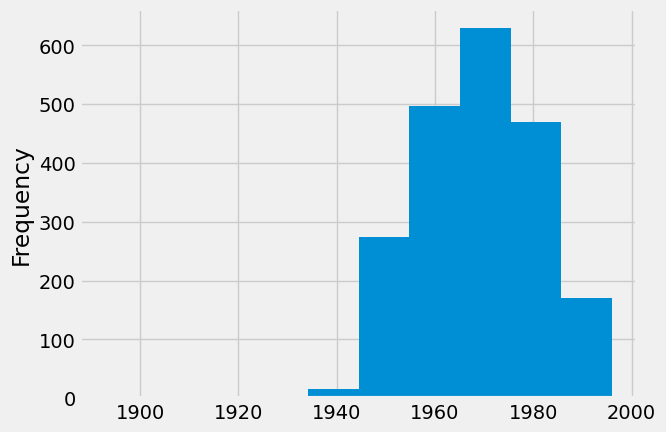

In [13]:
# let check the outlier in the numerical columns

df["Year_Birth"].plot(kind="hist")
plt.show()

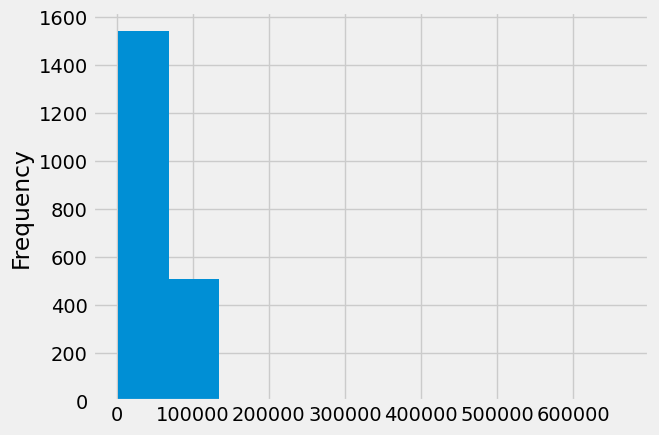

In [14]:
# let check the outlier in the numerical columns

df["Income"].plot(kind="hist")
plt.show()

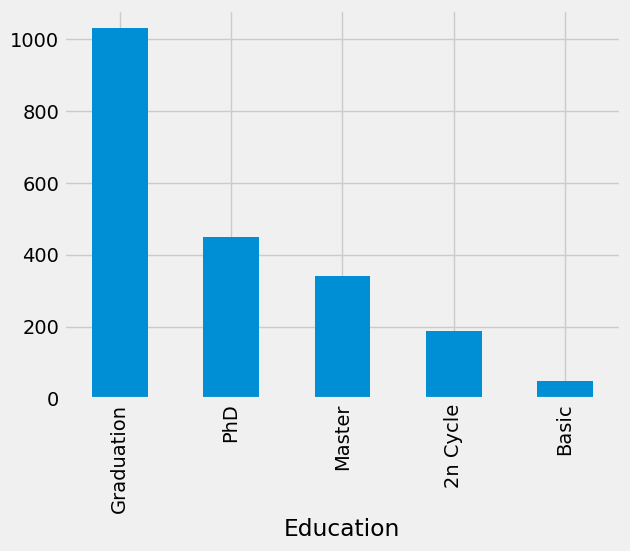

In [15]:
# what the common car in the dataset 

df["Education"].value_counts().plot(kind= "bar")
plt.show()

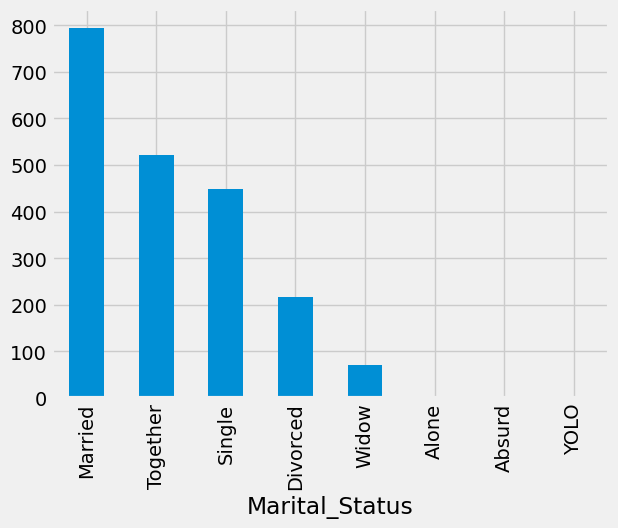

In [16]:
# what the common car in the dataset 

df["Marital_Status"].value_counts().plot(kind= "bar")
plt.show()

##### Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

##### let`s create new column call spend

In [17]:
# new column
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

<a id="3"></a>
# <p style="padding:10px;background-color:#000000;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px;overflow:hidden;font-weight:500">3️⃣ Building a Machine Learning Model || Clustering </p>

In [18]:
#Importing the basic librarires for building model
from sklearn.preprocessing import LabelEncoder # for make encoding / change from the category to numerical columns

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [19]:
#show the data again
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Spent
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,0,3,11,1,1617
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,0,3,11,0,27
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,3,11,0,776
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,0,3,11,0,53
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,0,3,11,0,422


In [20]:
# separation the data type columns [ object and numeric ]

cat = []
num = []
for i in df.columns:
    if df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

data_n=df[num]   # new dataframe just type numeric
data_c=df[cat]  # new dataframe just type object

In [21]:
# let start make the encoding 

label_encoders = {}
categorical_columns = data_c.columns  # I would recommend using columns names here if you're using pandas. If you're using numpy then stick with range(n) instead

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data_c[column] = label_encoders[column].fit_transform(data_c[column])

In [22]:
# merge 2 data set 
frames = [data_c, data_n]
  
data = pd.concat(frames,axis=1)

data.head()

,Education,Marital_Status,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Spent
0,2,4,1957,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,0,3,11,1,1617
1,2,4,1954,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,0,3,11,0,27
2,2,5,1965,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,3,11,0,776
3,2,5,1984,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,0,3,11,0,53
4,4,3,1981,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,0,3,11,0,422


In [23]:

#show the data type - new dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2058 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2058 non-null   int64  
 1   Marital_Status       2058 non-null   int64  
 2   Year_Birth           2058 non-null   int64  
 3   Income               2058 non-null   float64
 4   Kidhome              2058 non-null   int64  
 5   Teenhome             2058 non-null   int64  
 6   Recency              2058 non-null   int64  
 7   MntWines             2058 non-null   int64  
 8   MntFruits            2058 non-null   int64  
 9   MntMeatProducts      2058 non-null   int64  
 10  MntFishProducts      2058 non-null   int64  
 11  MntSweetProducts     2058 non-null   int64  
 12  MntGoldProds         2058 non-null   int64  
 13  NumDealsPurchases    2058 non-null   int64  
 14  NumWebPurchases      2058 non-null   int64  
 15  NumCatalogPurchases  2058 non-null   int64 

In [24]:
# bulid model using KMeans 

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(data)
    kmeanModel.fit(data)
 
    distortions.append(sum(np.min(cdist(data, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / data.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(data, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / data.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [25]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 17962.047733397405
2 : 9845.90961855602
3 : 9523.508809566889
4 : 6843.933515576507
5 : 5447.245050979507
6 : 5053.664388410414
7 : 4073.7698047963554
8 : 3545.7081771234
9 : 3162.78164950642


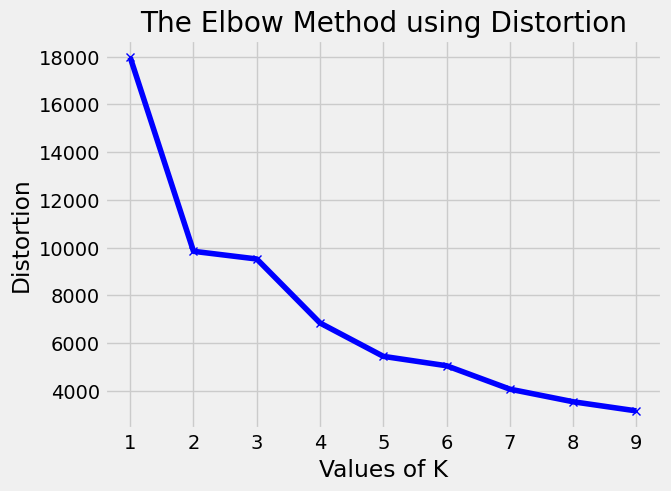

In [26]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

- I prefer using 4 clusters

In [27]:
#Initiating the Agglomerative Clustering model 
K_C = KMeans(n_clusters=4)
# fit model and predict clusters
yhat_KC = K_C.fit_predict(data)
#PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_KC

In [28]:
# show the new clusters 
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Spent,Clusters
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,3,11,1,1617,3
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,3,11,0,27,3
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,3,11,0,776,1
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,3,11,0,53,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,3,11,0,422,3


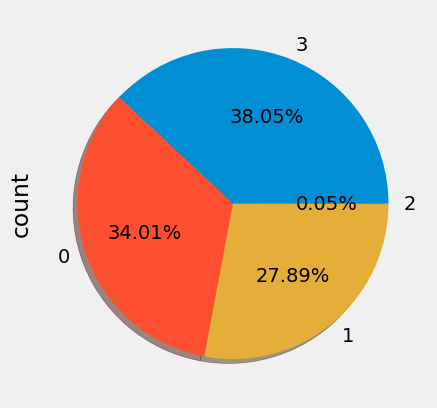

In [29]:
# show the new clusters 

df["Clusters"].value_counts().plot(kind= "pie",autopct='%1.2f%%', shadow = True)
plt.show()

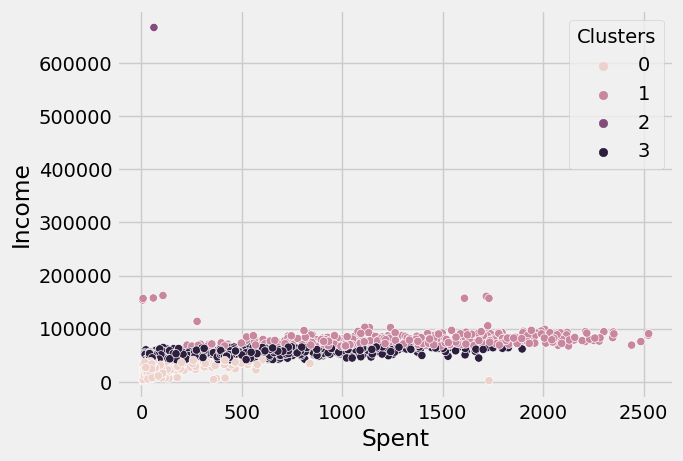

In [30]:
# let`s show the spent column with income column and the clusters 
sns.scatterplot(df, x="Spent", y= "Income",hue="Clusters")
plt.show()

# <div style = 'border : 3px solid non; background-color:#ffffff;font-family:Gabriola;color:#000080; ; ;padding:10px'>
<p style="font-family:Georgia;padding:20px;line-height:25px;";><font style="font-family:Georgia; font-size:150%;">   </font>
    <p style = "font-size:200%; color:#800080"> 📌 Result ML</p>
   

- This is small show how I can using KMeans - ML - Clusters 
- I choose 4 Clusters

#  📲 Connect me:
-  <a href="https://www.kaggle.com/qusaybtoush1990">kaggle</a>
-  <a href="https://www.linkedin.com/in/qusayal-btoush/">Linkedin</a>
-  <a href="https://github.com/qusaybtoush">github</a>

# Vote ❤️😃
- Please Upvote my kernel if you like my work.🙌

# The End 🤝🎉🤝🎉
### 🖐 Thank you 🙏